In [1]:
import pandas as pd

# Загрузка даних
dataframe = pd.read_csv('icecreamreviews.csv', delimiter=',', encoding='latin1')

# Видалення нульових значень
dataframe = dataframe.dropna()

# Вивід даних
dataframe

,key,author,date,stars,title,helpful_yes,helpful_no,text
0,0_bj,Ilovebennjerry,2017-04-15,3,Not enough brownies!,10,3,"Super good, don't get me wrong. But I came for..."
1,0_bj,Sweettooth909,2020-01-05,5,Iâm OBSESSED with this pint!,3,0,I decided to try it out although Iâm not a h...
2,0_bj,LaTanga71,2018-04-26,3,My favorite...More Caramel Please,5,2,My caramel core begins to disappear about half...
3,0_bj,chicago220,2018-01-14,5,Obsessed!!!,24,1,Why are people complaining about the blonde br...
4,0_bj,Kassidyk,2020-07-24,1,Worst Ice Cream Ever!,1,5,This ice cream is worst ice cream Iâve ever ...
...,...,...,...,...,...,...,...,...
7938,56_bj,Shellyshellzs,2020-04-30,5,Peanut butter fudge heaven,0,0,Oh man I use to be a whatever was on sale girl...
7939,56_bj,Or1234,2020-02-24,5,The best Chocolate Ice Cream Combo,0,0,This is the first chocolate ice cream Iâve t...
7940,56_bj,ava21,2020-01-31,5,PERFECT!!,0,0,This is the best pint of ice cream I've ever h...
7941,56_bj,yeee,2019-03-13,5,My favorite!,0,0,This is my favorite ice cream ever! Can't get ...


In [3]:
data = dataframe['text'][:1000]

data

0       Super good, don't get me wrong. But I came for...
1       I decided to try it out although Iâm not a h...
2       My caramel core begins to disappear about half...
3       Why are people complaining about the blonde br...
4       This ice cream is worst ice cream Iâve ever ...
                              ...                        
1024    Literally my favorite flavor. The waffle cone ...
1025    So perfect!!!!!! The caramel swirl is amazing!...
1026    Beauty, brains, and brawn. Chocolate, caramel,...
1027    This is one of the most delicious flavors of i...
1028    I'm new to B&J icecream, just got a whole bunc...
Name: text, Length: 1000, dtype: object

In [5]:
# Нормалізація тексту - приведення до нижнього регістру

data = data.str.lower()
    
print(data)

0       super good, don't get me wrong. but i came for...
1       i decided to try it out although iâm not a h...
2       my caramel core begins to disappear about half...
3       why are people complaining about the blonde br...
4       this ice cream is worst ice cream iâve ever ...
                              ...                        
1024    literally my favorite flavor. the waffle cone ...
1025    so perfect!!!!!! the caramel swirl is amazing!...
1026    beauty, brains, and brawn. chocolate, caramel,...
1027    this is one of the most delicious flavors of i...
1028    i'm new to b&j icecream, just got a whole bunc...
Name: text, Length: 1000, dtype: object


In [6]:
import re
# Нормалізація тексту - видалення пунктуації

# Метод для видалення пунктуації
def remove_punctuation(text):
    return text.apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Видалення пунктуації з тексту
data = remove_punctuation(data)

data

0       super good dont get me wrong but i came for th...
1       i decided to try it out although iâm not a hug...
2       my caramel core begins to disappear about half...
3       why are people complaining about the blonde br...
4       this ice cream is worst ice cream iâve ever ta...
                              ...                        
1024    literally my favorite flavor the waffle cone p...
1025              so perfect the caramel swirl is amazing
1026    beauty brains and brawn chocolate caramel cone...
1027    this is one of the most delicious flavors of i...
1028    im new to bj icecream just got a whole bunch o...
Name: text, Length: 1000, dtype: object

In [8]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Токенізація тексту (розбиття на слова)

# Функція для токенізації
def tokenize_text(text):
    return text.apply(lambda x: word_tokenize(x))

tokenized_data = tokenize_text(data)

tokenized_data

0       [super, good, dont, get, me, wrong, but, i, ca...
1       [i, decided, to, try, it, out, although, iâm, ...
2       [my, caramel, core, begins, to, disappear, abo...
3       [why, are, people, complaining, about, the, bl...
4       [this, ice, cream, is, worst, ice, cream, iâve...
                              ...                        
1024    [literally, my, favorite, flavor, the, waffle,...
1025      [so, perfect, the, caramel, swirl, is, amazing]
1026    [beauty, brains, and, brawn, chocolate, carame...
1027    [this, is, one, of, the, most, delicious, flav...
1028    [im, new, to, bj, icecream, just, got, a, whol...
Name: text, Length: 1000, dtype: object

In [12]:
import nltk
from nltk.corpus import stopwords

# Видалення стоп слів

# Функція для видалення стоп-слів
def remove_stopwords(text):
    stop_words = set(stopwords.words('English'))
    return text.apply(lambda x: [word for word in word_tokenize(x) if word.lower() not in stop_words])

# Видалення стоп-слів з тексту
data_without_stopwords = remove_stopwords(data)

data_without_stopwords

0       [super, good, dont, get, wrong, came, caramel,...
1       [decided, try, although, iâm, huge, caramel, f...
2       [caramel, core, begins, disappear, half, way, ...
3       [people, complaining, blonde, brownies, donât,...
4       [ice, cream, worst, ice, cream, iâve, ever, ta...
                              ...                        
1024    [literally, favorite, flavor, waffle, cone, pr...
1025                   [perfect, caramel, swirl, amazing]
1026    [beauty, brains, brawn, chocolate, caramel, co...
1027    [one, delicious, flavors, ice, cream, iâve, ev...
1028    [im, new, bj, icecream, got, whole, bunch, fla...
Name: text, Length: 1000, dtype: object

In [10]:
from nltk.stem import PorterStemmer

# Стеммінг тексту

# Ініціалізація моделі для стеммінгу
porter = PorterStemmer()

# Функція для стеммінгу
def stemming_text(text):
    return text.apply(lambda x: ' '.join([porter.stem(word) for word in word_tokenize(x)]))

# Застосування стеммінгу до тексту
stemmed_data = stemming_text(data)

stemmed_data

0       super good dont get me wrong but i came for th...
1       i decid to tri it out although iâm not a huge ...
2       my caramel core begin to disappear about half ...
3       whi are peopl complain about the blond browni ...
4       thi ice cream is worst ice cream iâv ever tast...
                              ...                        
1024    liter my favorit flavor the waffl cone price a...
1025                 so perfect the caramel swirl is amaz
1026    beauti brain and brawn chocol caramel cone the...
1027    thi is one of the most delici flavor of ice cr...
1028    im new to bj icecream just got a whole bunch o...
Name: text, Length: 1000, dtype: object

In [17]:
from nltk.stem import WordNetLemmatizer

# Ініціалізація моделі лематизатора
lemmatizer = WordNetLemmatizer()

# Функція для лематизації тексту
def lemmatize_text(text):
    return text.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

# Лематизація тексту
lemmatized_data = lemmatize_text(data)

lemmatized_data

0       super good dont get me wrong but i came for th...
1       i decided to try it out although iâm not a hug...
2       my caramel core begin to disappear about half ...
3       why are people complaining about the blonde br...
4       this ice cream is worst ice cream iâve ever ta...
                              ...                        
1024    literally my favorite flavor the waffle cone p...
1025              so perfect the caramel swirl is amazing
1026    beauty brain and brawn chocolate caramel cone ...
1027    this is one of the most delicious flavor of ic...
1028    im new to bj icecream just got a whole bunch o...
Name: text, Length: 1000, dtype: object

In [18]:
# Видалення пунктуації та цифр

# Функція для видалення пунктуації та цифр
def remove_punctuation_and_digits(text):
    return text.apply(lambda x: re.sub(r'[^\w\s]|[\d]', '', x))

# Видалення пунктуації та цифр з тексту
cleaned_data = remove_punctuation_and_digits(data)

cleaned_data

0       super good dont get me wrong but i came for th...
1       i decided to try it out although iâm not a hug...
2       my caramel core begins to disappear about half...
3       why are people complaining about the blonde br...
4       this ice cream is worst ice cream iâve ever ta...
                              ...                        
1024    literally my favorite flavor the waffle cone p...
1025              so perfect the caramel swirl is amazing
1026    beauty brains and brawn chocolate caramel cone...
1027    this is one of the most delicious flavors of i...
1028    im new to bj icecream just got a whole bunch o...
Name: text, Length: 1000, dtype: object

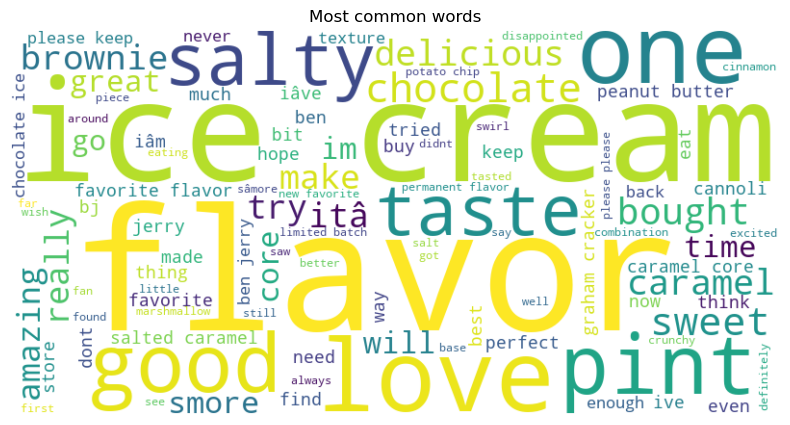

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Візуалізація найбільш вживаних слів за допомогою WordCloud

# Ініціалізація WordCloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(data))

# Візуалізація WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most common words')
plt.axis('off')
plt.show()

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Ініціалізація TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data)

# Отримання списку термінів
terms = tfidf.get_feature_names_out()

# Виведення перших 30 термінів та їх зважених значень
for i in range(30):
    print(f"Term: {terms[i]}, TF-IDF value: {tfidf_matrix[0, i]}")

Term: 010, TF-IDF value: 0.0
Term: 076840036745, TF-IDF value: 0.0
Term: 0920, TF-IDF value: 0.0
Term: 0h, TF-IDF value: 0.0
Term: 10, TF-IDF value: 0.0
Term: 100, TF-IDF value: 0.0
Term: 1000, TF-IDF value: 0.0
Term: 100s, TF-IDF value: 0.0
Term: 1010, TF-IDF value: 0.0
Term: 11, TF-IDF value: 0.0
Term: 12, TF-IDF value: 0.0
Term: 1210, TF-IDF value: 0.0
Term: 12319, TF-IDF value: 0.0
Term: 14, TF-IDF value: 0.0
Term: 15, TF-IDF value: 0.0
Term: 16, TF-IDF value: 0.0
Term: 180, TF-IDF value: 0.0
Term: 19, TF-IDF value: 0.0
Term: 1st, TF-IDF value: 0.0
Term: 20, TF-IDF value: 0.0
Term: 2013, TF-IDF value: 0.0
Term: 2014, TF-IDF value: 0.0
Term: 2016, TF-IDF value: 0.0
Term: 2019, TF-IDF value: 0.0
Term: 2259, TF-IDF value: 0.0
Term: 23, TF-IDF value: 0.0
Term: 24th, TF-IDF value: 0.0
Term: 25, TF-IDF value: 0.0
Term: 27, TF-IDF value: 0.0
Term: 2nd, TF-IDF value: 0.0


In [30]:
from sklearn.feature_extraction.text import CountVectorizer

# Створення мішків слів з допомогою CountVectorizer

# Ініціалізація моделі CountVectorizer
count_vectorizer = CountVectorizer()

# Трансформація даних
bag_of_words = count_vectorizer.fit_transform(data)

# Запис у змінну першого мішка слів
first_document = bag_of_words[0]

# Отримання індексів слів
feature_names = count_vectorizer.get_feature_names_out()

# Створення словника, який показує кількість входжень кожного слова у першому документі
word_count = dict(zip(feature_names, first_document.toarray()[0]))

print(word_count)

{'010': 0, '076840036745': 0, '0920': 0, '0h': 0, '10': 0, '100': 0, '1000': 0, '100s': 0, '1010': 0, '11': 0, '12': 0, '1210': 0, '12319': 0, '14': 0, '15': 0, '16': 0, '180': 0, '19': 0, '1st': 0, '20': 0, '2013': 0, '2014': 0, '2016': 0, '2019': 0, '2259': 0, '23': 0, '24th': 0, '25': 0, '27': 0, '2nd': 0, '30': 0, '34': 0, '34s': 0, '35': 0, '37': 0, '45': 0, '450pt': 0, '4th': 0, '50': 0, '500': 0, '5095': 0, '5th': 0, '63yearold': 0, '67834702': 0, '67867261': 0, '90': 0, '930pm': 0, 'aallllll': 0, 'ability': 0, 'able': 0, 'abomination': 0, 'abound': 0, 'about': 0, 'absolute': 0, 'absolutely': 0, 'absolutley': 0, 'absurd': 0, 'abuelita': 0, 'accident': 0, 'accidentally': 0, 'account': 0, 'accross': 0, 'accurate': 0, 'achieve': 0, 'achieved': 0, 'across': 0, 'actively': 0, 'activism': 0, 'actual': 0, 'actually': 0, 'add': 1, 'added': 0, 'addict': 0, 'addicted': 0, 'addicting': 0, 'addiction': 0, 'addictive': 0, 'addictivedefinitely': 0, 'addictthe': 0, 'adding': 0, 'addins': 0, 'a

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Ініціалізація TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data)

# Застосування K-means для кластеризації
num_clusters = 5 
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(tfidf_matrix)

# Отримання міток кластерів для даних
clusters = kmeans.labels_

# Виведення перших 30 документів та до якого кластеру вони належать для перевірки
for i in range(30):
    print(f"Document {i+1} - Cluster {clusters[i]}")

Document 1 - Cluster 1
Document 2 - Cluster 3
Document 3 - Cluster 3
Document 4 - Cluster 1
Document 5 - Cluster 3
Document 6 - Cluster 3
Document 7 - Cluster 3
Document 8 - Cluster 3
Document 9 - Cluster 3
Document 10 - Cluster 3
Document 11 - Cluster 3
Document 12 - Cluster 3
Document 13 - Cluster 0
Document 14 - Cluster 3
Document 15 - Cluster 3
Document 16 - Cluster 3
Document 17 - Cluster 3
Document 18 - Cluster 3
Document 19 - Cluster 3
Document 20 - Cluster 1
Document 21 - Cluster 4
Document 22 - Cluster 3
Document 23 - Cluster 3
Document 24 - Cluster 3
Document 25 - Cluster 3
Document 26 - Cluster 3
Document 27 - Cluster 3
Document 28 - Cluster 3
Document 29 - Cluster 0
Document 30 - Cluster 3
